In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/aslDataset/asl_dataset'

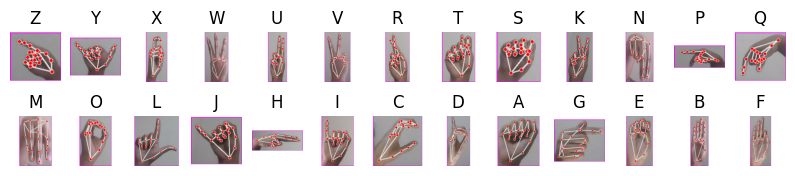

In [4]:
fig, ax = plt.subplots(2, 13, figsize=(10, 2))

img_classes = [os.path.join(path, im) for im in os.listdir(path)]

ax = ax.flatten()

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

plt.show()

In [5]:
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    num_images = len(image_files)
    print(folder, 'Number of images in folder:', num_images)

Z Number of images in folder: 200
Y Number of images in folder: 200
X Number of images in folder: 200
W Number of images in folder: 200
U Number of images in folder: 200
V Number of images in folder: 200
R Number of images in folder: 200
T Number of images in folder: 200
S Number of images in folder: 200
K Number of images in folder: 200
N Number of images in folder: 200
P Number of images in folder: 200
Q Number of images in folder: 200
M Number of images in folder: 200
O Number of images in folder: 200
L Number of images in folder: 200
J Number of images in folder: 200
H Number of images in folder: 200
I Number of images in folder: 200
C Number of images in folder: 200
D Number of images in folder: 200
A Number of images in folder: 200
G Number of images in folder: 200
E Number of images in folder: 200
B Number of images in folder: 200
F Number of images in folder: 200


In [6]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal')
])

data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    seed=123,
    label_mode='categorical',
    subset="training"
)

Found 5200 files belonging to 26 classes.
Using 4160 files for training.


In [7]:
train_size = int(0.8 * len(data))
val_size = int(0.2 * len(data)) + 1

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    seed=123,
    label_mode='categorical',
    subset="validation"
)

Found 5200 files belonging to 26 classes.
Using 1040 files for validation.


In [8]:
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))
train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)

In [9]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation = 'softmax')
])

In [10]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

cnn_model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [11]:
history = cnn_model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/10
104/104 [==============================] - 21s 130ms/step - loss: 3.1153 - accuracy: 0.0694 - val_loss: 2.2084 - val_accuracy: 0.3281
Epoch 2/10
104/104 [==============================] - 11s 107ms/step - loss: 1.8653 - accuracy: 0.3915 - val_loss: 1.8519 - val_accuracy: 0.4724
Epoch 3/10
104/104 [==============================] - 6s 61ms/step - loss: 1.1601 - accuracy: 0.6283 - val_loss: 1.2507 - val_accuracy: 0.6130
Epoch 4/10
104/104 [==============================] - 6s 57ms/step - loss: 0.8262 - accuracy: 0.7314 - val_loss: 0.9662 - val_accuracy: 0.6947
Epoch 5/10
104/104 [==============================] - 11s 107ms/step - loss: 0.6447 - accuracy: 0.7846 - val_loss: 0.5681 - val_accuracy: 0.8053
Epoch 6/10
104/104 [==============================] - 11s 107ms/step - loss: 0.4965 - accuracy: 0.8483 - val_loss: 0.3543 - val_accuracy: 0.8774
Epoch 7/10
104/104 [==============================] - 6s 58ms/step - loss: 0.4116 - accuracy: 0.8675 - val_loss: 0.2811 - val_accuracy

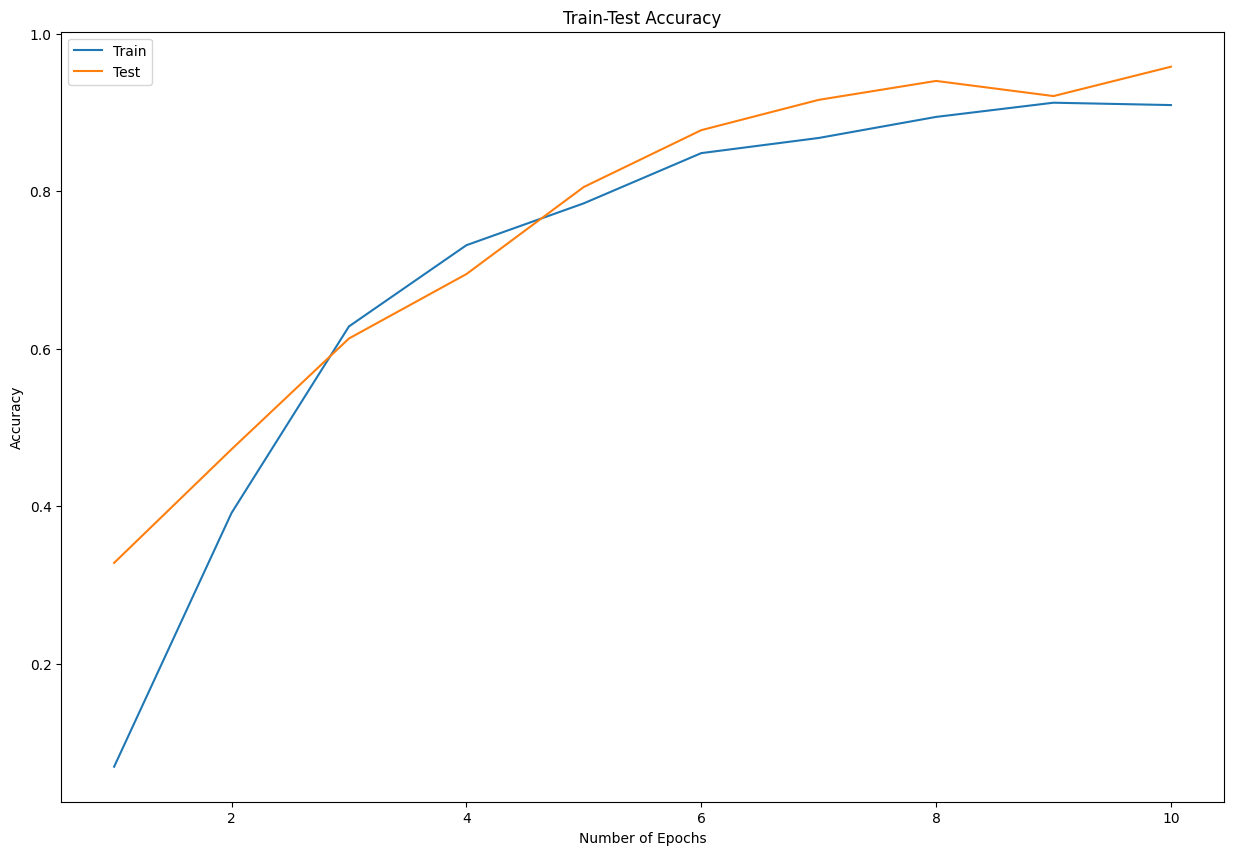

In [12]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(15, 10))
plt.plot(epochs, history.history['accuracy'], label="Train")
plt.plot(epochs, history.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

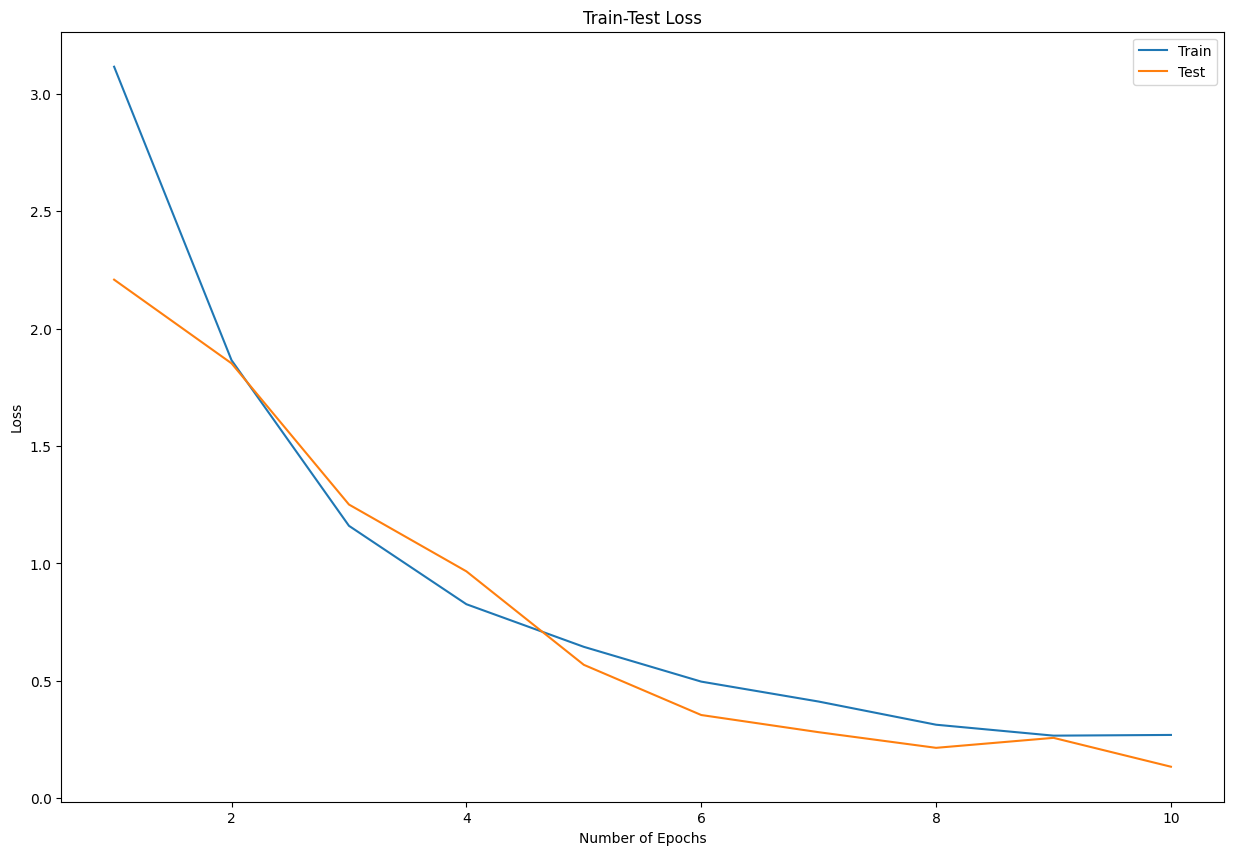

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(epochs, history.history['loss'], label="Train")
plt.plot(epochs, history.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
cnn_model.evaluate(test_data)

33/33 [==============================] - 2s 38ms/step - loss: 0.1884 - accuracy: 0.9490


[0.18835671246051788, 0.9490384459495544]

In [15]:
cnn_model.save("/content/drive/MyDrive/American_sign_language.h5")